In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model
model = KNeighborsClassifier()

# Define the hyperparameters to tune
param_dist = {
    'n_neighbors':  np.random.randint(1, 10, size=10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5) # default 5-fold cross validation
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the model on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

y_pred = best_model.predict(X_test)


Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 2, 'algorithm': 'auto'}
Best Score: 0.7248768472906404
Test Score: 0.7777777777777778


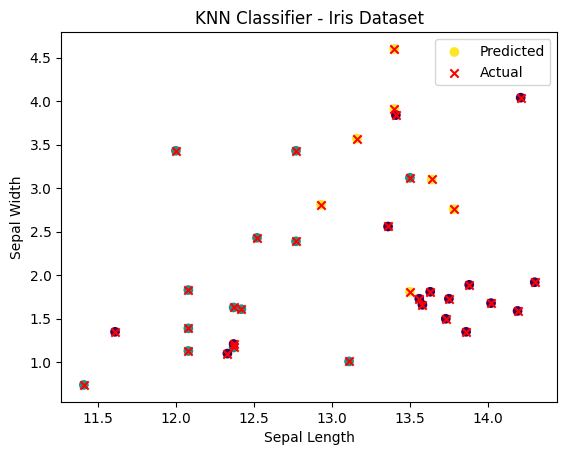

In [5]:
import matplotlib.pyplot as plt

# Plot the results: Accuracy: 1.0
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, label='Predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker='x', label='Actual')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Classifier - Iris Dataset')
plt.legend()
plt.show()

In [4]:
import pandas as pd

# Create a DataFrame from the diabetes dataset for the features and target variable
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the DataFrame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000
